In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)      #指定随机种子

In [6]:
def zero_pad(X,pad):
    X_pad=np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant',constant_values=0)
    return X_pad

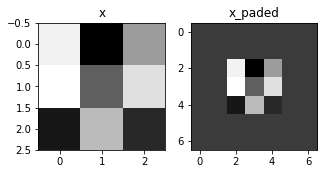

In [10]:
np.random.seed(1)
X=np.random.randn(4,3,3,2)
X_pad=zero_pad(X,2)
fig,ax=plt.subplots(1,2)
ax[0].set_title('x')
ax[0].imshow(X[0,:,:,0])
ax[1].set_title('x_paded')
ax[1].imshow(X_pad[0,:,:,0])

In [11]:
def conv_single_step(a_slice_prev,W,b):
    s=np.multiply(a_slice_prev,W)+b
    Z=np.sum(Z)
    return Z

In [12]:
def conv_forward(A_prev, W, b, hparameters):
    """
    实现卷积函数的前向传播

    参数：
        A_prev - 上一层的激活输出矩阵，维度为(m, n_H_prev, n_W_prev, n_C_prev)，（样本数量，上一层图像的高度，上一层图像的宽度，上一层过滤器数量）
        W - 权重矩阵，维度为(f, f, n_C_prev, n_C)，（过滤器大小，过滤器大小，上一层的过滤器数量，这一层的过滤器数量）
        b - 偏置矩阵，维度为(1, 1, 1, n_C)，（1,1,1,这一层的过滤器数量）
        hparameters - 包含了"stride"与 "pad"的超参数字典。

    返回：
        Z - 卷积输出，维度为(m, n_H, n_W, n_C)，（样本数，图像的高度，图像的宽度，过滤器数量）
        cache - 缓存了一些反向传播函数conv_backward()需要的一些数据
    """
    (m,n_H_prev,n_W_prev,n_C_prev)=A_prev.shape
    (f,f,n_C_prev,n_C)=W.shape
    stride=hparameters["stride"]
    pad=hparameters["pad"]
    n_H=int((n_H_prev+2*pad-f)/stride)+1
    n_W=int((n_W_prev+2*pad-f)/stride)+1
    Z=np.zeros((n_H,n_W,n_C))
    A_prev_pad = zero_pad(A_prev,pad)
    for i in range(m):
        a_prev_pad=A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start=h*stride
                    vert_end=vert_start+f
                    horiz_start=w*stride
                    horiz_end=horiz_start+f
                    Z[i,h,w,c]=conv_single_step(a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:],W[:,:,:,c],b[0,0,0,c])
    #存储一些缓存值，以便于反向传播使用
    cache = (A_prev,W,b,hparameters)

    return (Z , cache)     